In [1]:
import os
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
from raceplotly.plots import barplot

In [2]:
from wordcloud import WordCloud, ImageColorGenerator

# Plotly plots for IMDb data

Contains plotly plots (that are not embedded in the github repository) and calculations used for story telling related to IMDb. For instance, introductory plots and calculations.

In [3]:
# load data
data_dir = os.getcwd() + os.sep + 'data'
filepath = rf"{data_dir}{os.sep}Quotebank_sentiment.pkl"

df_Quotebank = pd.read_pickle(filepath)
df_Quotebank.head()

,quotation,speaker,qids,date,numOccurrences,probas,urls,movie,shared_ID,AFINN_label,AFINN_score,VADER_label,VADER_score,BERT_label,BERT_score,positive_BERT_score,scaledReverted_BERT_score
0,Is Ferguson like Mockingjay?,Laci Green,[Q16843606],2015-11-15,1,"[[Laci Green, 0.9013], [None, 0.0987]]",[http://www.dailykos.com/story/2015/11/15/1450...,The Hunger Games: Mockingjay - Part 2,1751,POSITIVE,0.500000,POSITIVE,0.3612,NEGATIVE,0.989802,0.010198,-0.541032
1,I want to clarify my interview on the `Charlie...,George Lucas,"[Q38222, Q1507803]",2015-12-31,7,"[[George Lucas, 0.5327], [None, 0.4248], [Char...",[http://www.escapistmagazine.com/news/view/165...,Star Wars: Episode VII - The Force Awakens,6724,POSITIVE,0.165563,POSITIVE,0.9910,POSITIVE,0.999293,0.999293,0.787788
2,Is Daredevil joining the Avengers for Infinity...,Scott Davis,"[Q1373440, Q7436227, Q7436228, Q7436226, Q1619...",2015-12-10,2,"[[None, 0.4806], [Scott Davis, 0.4017], [Antho...",[http://www.flickeringmyth.com/2015/12/is-dare...,Avengers: Age of Ultron,692,NEGATIVE,-0.153846,NEGATIVE,-0.6369,NEGATIVE,0.833872,0.166128,-0.208302
3,"They were saying, `Well, since when has Star W...",J.J. Abrams,[Q188137],2015-12-21,1,"[[J.J. Abrams, 0.5868], [None, 0.2584], [Lupit...",[http://rssfeeds.usatoday.com/~/129385923/0/us...,Star Wars: Episode VII - The Force Awakens,2394,POSITIVE,0.000000,NEGATIVE,-0.3612,NEGATIVE,0.991336,0.008664,-0.559515
4,You meet new characters and you learn about Ha...,Kevin Feige,[Q515161],2015-05-06,1,"[[Kevin Feige, 0.9108], [None, 0.0782], [Scott...",[http://www.digitaltrends.com/movies/ant-man-m...,Avengers: Age of Ultron,8789,NEGATIVE,-0.011111,POSITIVE,0.1901,POSITIVE,0.999218,0.999218,0.776419


**Number of Quotes per year**

In [13]:
groups = df_Quotebank.groupby('year').numOccurrences

In [20]:
fig = px.bar(x=groups.sum().index.astype(str), y=groups.sum(), labels={'x':'Year', 'y':'Number of Quotes'},
             color=groups.sum().index.astype(str), 
             color_discrete_sequence=px.colors.qualitative.Safe) 

fig.update_layout(showlegend=False)
fig.update_traces(texttemplate='<b>%{y}</b>')          
fig.show()

filename = 'yearly_Quotes'
pio.write_html(fig, rf"{os.getcwd()}{os.sep}plotlyplots{os.sep}{filename}.html")


In [8]:
df_Quotebank.numOccurrences.sum()

150933

In [29]:
positive_quotes = df_Quotebank.quotation[df_Quotebank.BERT_label == 'POSITIVE']
negative_quotes = df_Quotebank.quotation[df_Quotebank.BERT_label == 'NEGATIVE']

In [32]:
from PIL import Image

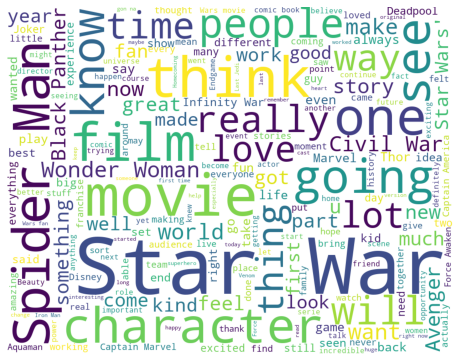

In [39]:
plt.subplots(figsize = (8,8))

some_mask = np.array(Image.open(r"C:\Users\Albert Kjøller\Desktop\quote.png"))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384,
                    mask=some_mask,
                    contour_color='red'
                        ).generate((" ").join(positive_quotes))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
#plt.savefig('Plotly-World_Cloud.png')
plt.show()

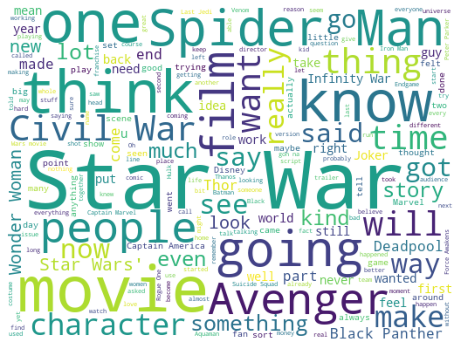

In [31]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate((" ").join(negative_quotes))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
#plt.savefig('Plotly-World_Cloud.png')
plt.show()